### Import all the library needed. 
##### Before importing deepxde, import the library ''sys'' and add the path to the library repository. Don't forget to import the tensor backed you want to use

In [1]:
import sys
sys.path.append('../../raNNdom')

import deepxde as dde
import matplotlib.pyplot as plt
import numpy as np
# Import tf if using backend tensorflow.compat.v1 or tensorflow
from deepxde.backend import tf

Using backend: tensorflow
Other supported backends: tensorflow.compat.v1, pytorch, jax, paddle.
paddle supports more examples now and is recommended.


### Define the pde, the boundary conditions and (optionally) the exact solution
##### The first and second order derivatives are computed by using deepxde.grad.jacobian and deepxde.grad.hessian 

In [2]:
def pde(x, y):
    dy_xx = dde.grad.hessian(y, x)
    # Use tf.sin for backend tensorflow.compat.v1 or tensorflow
    return -dy_xx + 10*x**3 + 15.6*x**2 - 16.2*x - 11

def boundary(x, on_boundary):
    return on_boundary

def func(x):
    return 0.5*x**5 + 1.3*x**4 - 2.7*x**3 - 5.5*x**2 + 2.7*x + 2.3

##### Define the geometry of the problem, compute the boundary conditions over the geometry and construct the training and validation set

In [3]:
geom = dde.geometry.Interval(-3, 2)
bc = dde.icbc.DirichletBC(geom, func, boundary)
data = dde.data.PDE(geom, pde, bc, 36, 2, solution=func, num_test=100)

### Define the Neural Network architecture
##### In the layer_size variable you have to list the size of each layer, from input to output. In activation you have to list all the activation functions for each hidden layer and the output layer.

In [4]:
M = 100
layer_size = [1] + [M]  +  [1]

activation = ["random_sin", 'linear']

initializer = "Glorot uniform"
R = 10
net = dde.nn.random_FNN(layer_size, activation, initializer, Rm=R, b=R)

### Compile the model, train it and visualize the reconstructed solution

Compiling model...
'compile' took 0.000366 s

Training model...

Step      Train loss              Test loss               Test metric   
0         [3.22e+03, 2.02e+00]    [2.56e+03, 2.02e+00]    [1.15e+00]    
28        [7.97e-03, 1.59e-07]    [3.34e-02, 1.59e-07]    [1.36e-03]    

Best model at step 28:
  train loss: 7.97e-03
  test loss: 3.34e-02
  test metric: [1.36e-03]

'train' took 5.868068 s



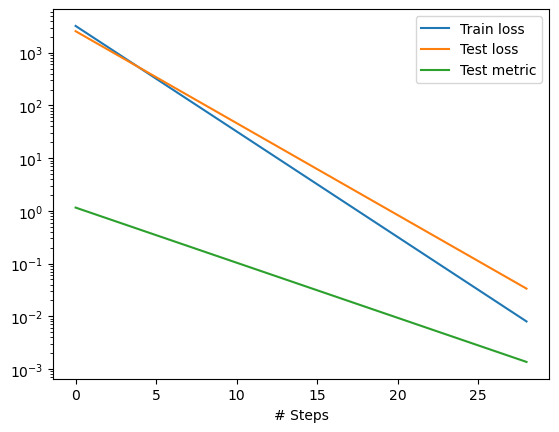

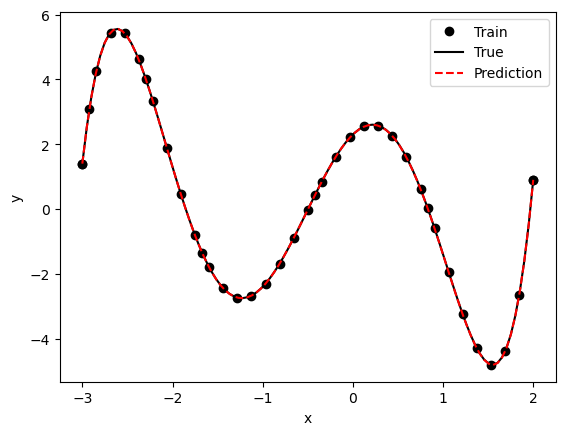

In [5]:
model = dde.Model(data, net)

model.compile("L-BFGS", lr=0.001, metrics=["l2 relative error"], loss_weights=1)

losshistory, train_state = model.train(iterations=50000)

dde.saveplot(losshistory, train_state, issave=False, isplot=True)